> Done individually by Harkirat Singh Chahal (1218753575)

# Homework 1

## Reusable function

In [72]:
def simulate_and_fit_logistic_regression(num_sims, x, beta):
    # Initialize arrays to store the MLEs
    mle_intercept = np.zeros(num_sims)
    mle_slope = np.zeros(num_sims)

    # Initialize arrays to store the probabilities
    probs = np.zeros((num_sims, len(x)))
    
    XX = sm.add_constant(x.reshape((len(x), 1)))
    
    for i in range(num_sims):
        # Generate binary response data using the true parameters
        y = np.random.binomial(1, 1 / (1 + np.exp(-(beta[0] + beta[1] * x))))

        # Fit logistic regression model
        lfit2 = sm.Logit(y, XX).fit(disp=0)

        # Store the MLEs
        mle_intercept[i] = lfit2.params[0]
        mle_slope[i] = lfit2.params[1]

        # Store the probabilities
        probs[i] = 1 / (1 + np.exp(-(lfit2.params[0] + lfit2.params[1] * x)))
    
    return mle_intercept, mle_slope, probs

## Part 1

In [2]:
import numpy as np

n=500 #sample size
beta = (1,.5) # true (intercept, slope)

##set seed
np.random.seed(34)

## draw x ~ N(0,1)
x = np.random.randn(n)

## sort x to make plotting better
x = np.sort(x)

## compute prob Y=1|x
py1 = 1/(1+np.exp(-(beta[0] + beta[1] * x)))

## storage for simulation results
y = np.zeros(n,dtype='int')

## simulate y and compute py1
for i in range(n):
    y[i] = np.random.binomial(1,py1[i])

In [3]:
y=np.random.binomial(1,py1)

#### Timing the loop vs vectorization

In [4]:
%timeit y=np.random.binomial(1,py1)

35.8 µs ± 248 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%timeit for i in range(n): y[i] = np.random.binomial(1,py1[i])

1.25 ms ± 4.75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


> The vectorized code is significantly faster than the loop

## Part 2

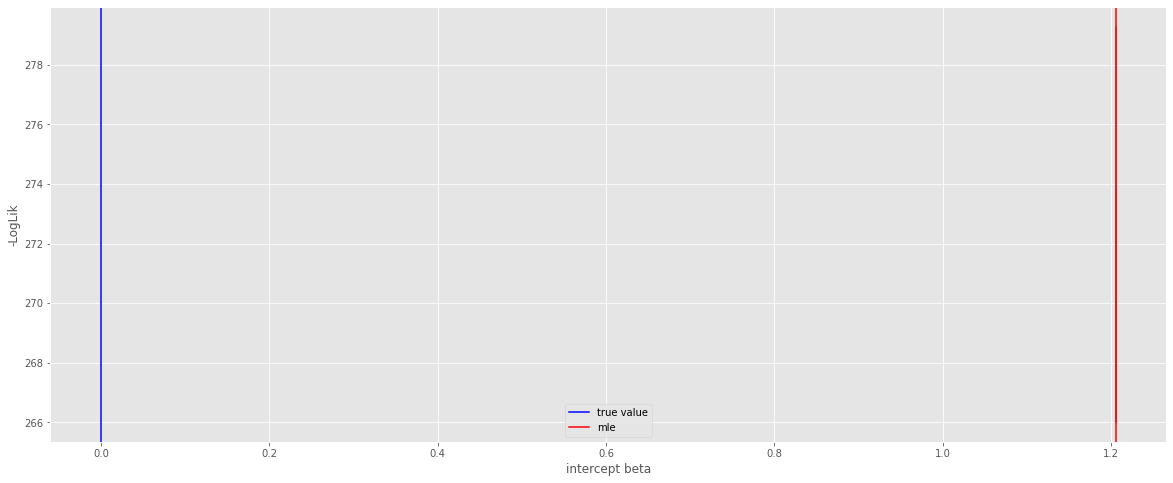

In [84]:
ii = llv.argmin()
plt.plot(bMat[:,0],llv)
plt.axvline(beta[0],c='blue',label='true value')
plt.axvline(bMat[ii,0],c='red',label='mle')
plt.xlabel('intercept beta'); plt.ylabel('-LogLik')
plt.legend()

if True:
    figure = plt.gcf()

## Part 3

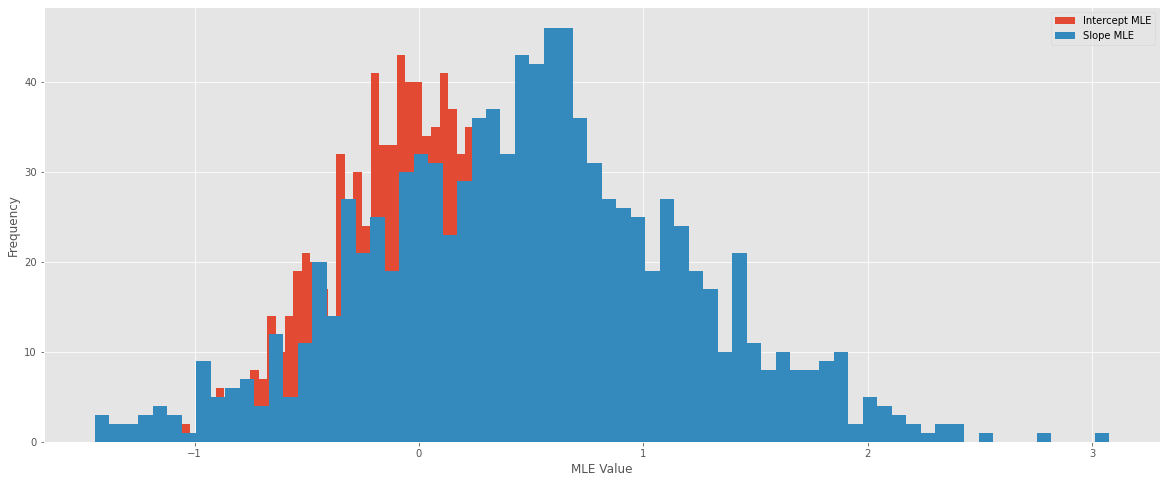

In [73]:
np.random.seed(42)

# Number of simulations
num_sims = 1000

# x values
x = np.linspace(0, 1, 100)

# True parameters
beta = [0, 0.5]
  
mle_intercept, mle_slope, probs = simulate_and_fit_logistic_regression(num_sims, x, beta)

# Plot the histograms of the MLEs
plt.hist(mle_intercept, bins=70, label='Intercept MLE')
plt.hist(mle_slope, bins=70, label='Slope MLE')
plt.xlabel('MLE Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Part 4

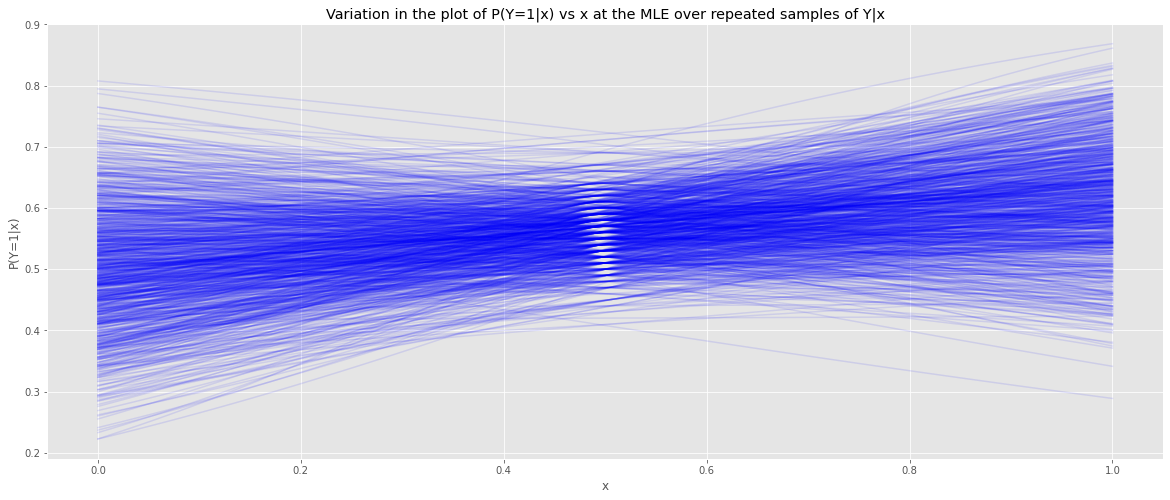

In [80]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time

np.random.seed(42)

# Number of simulations
num_sims = 1000

# x values
x = np.linspace(0, 1, 100)

# True parameters
beta = [0, 0.5]

# Initialize arrays to store the MLEs
mle_intercept = np.zeros(num_sims)
mle_slope = np.zeros(num_sims)

# Initialize arrays to store the probabilities
probs = np.zeros((num_sims, len(x)))

# Save X and XX as a constant value to avoid recomputing it in each iteration
X = x.reshape((len(x), 1)).copy()
XX = sm.add_constant(X)

mle_intercept, mle_slope, probs = simulate_and_fit_logistic_regression(num_sims, x, beta)

# Plot the probabilities
for i in range(num_sims):
    plt.plot(x, probs[i], alpha=0.1, color='blue')

plt.xlabel('x')
plt.ylabel('P(Y=1|x)')
plt.title('Variation in the plot of P(Y=1|x) vs x at the MLE over repeated samples of Y|x')
plt.show()


In [ ]:
!jupyter nbconvert --to pdf --output-dir="./pdfs" --no-input your_notebook.ipynb

In [2]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
